# Ethereum Machine Learning Golden Cross Algorithmic Trading

## Background

In this workbook, we've trained support vector machine (SVM) model to make trading predictions, backtested the results, and then evaluated its performance compared to that of a logistic regression model for ETH.

## References

* [SKLearn SVM - SVC Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

* [SKLearn LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

---

In [37]:
# Imports
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
import san

### Read the CSV file into Pandas DataFrame

In [2]:
# Pull the OHLCV dataset from Santiment into a Pandas Dataframe
trading_df = san.get(
    "ohlcv/ethereum",
    from_date="2018-12-01",
    to_date="2021-12-01",
    interval="1d"
)

trading_df.columns = ['open', 'close', 'high', 'low', 'volume', 'marketcap']

# Review the DataFrame
trading_df.head()

open       close        high         low  \
datetime                                                                    
2018-12-01 00:00:00+00:00  113.397762  118.635559  120.841454  111.541072   
2018-12-02 00:00:00+00:00  118.268151  116.388899  120.562047  116.092041   
2018-12-03 00:00:00+00:00  116.398687  108.925018  116.619068  107.312815   
2018-12-04 00:00:00+00:00  108.756033  110.214190  113.142914  107.402721   
2018-12-05 00:00:00+00:00  110.335518  102.475556  110.641389  102.475556   

                                 volume     marketcap  
datetime                                               
2018-12-01 00:00:00+00:00  2.131476e+09  1.228412e+10  
2018-12-02 00:00:00+00:00  1.856199e+09  1.205377e+10  
2018-12-03 00:00:00+00:00  1.772756e+09  1.128291e+10  
2018-12-04 00:00:00+00:00  1.748116e+09  1.141862e+10  
2018-12-05 00:00:00+00:00  1.990158e+09  1.061888e+10

### Add a daily return values column to the DataFrame

In [3]:
# Calculate the daily returns using the closing prices and the pct_change function
trading_df["actual_returns"] = trading_df["close"].pct_change()

# Drop all NaN values from the DataFrame
trading_df = trading_df.dropna()

# Review the DataFrame
display(trading_df.head())
display(trading_df.tail())

open       close        high         low  \
datetime                                                                    
2018-12-02 00:00:00+00:00  118.268151  116.388899  120.562047  116.092041   
2018-12-03 00:00:00+00:00  116.398687  108.925018  116.619068  107.312815   
2018-12-04 00:00:00+00:00  108.756033  110.214190  113.142914  107.402721   
2018-12-05 00:00:00+00:00  110.335518  102.475556  110.641389  102.475556   
2018-12-06 00:00:00+00:00  102.422572   91.804131  104.103496   91.761056   

                                 volume     marketcap  actual_returns  
datetime                                                               
2018-12-02 00:00:00+00:00  1.856199e+09  1.205377e+10       -0.018937  
2018-12-03 00:00:00+00:00  1.772756e+09  1.128291e+10       -0.064129  
2018-12-04 00:00:00+00:00  1.748116e+09  1.141862e+10        0.011835  
2018-12-05 00:00:00+00:00  1.990158e+09  1.061888e+10       -0.070214  
2018-12-06 00:00:00+00:00  2.311803e+09  9.514882e+09       -0.104136

open        close         high          low  \
datetime                                                                        
2021-11-27 00:00:00+00:00  4051.504075  4096.912088  4183.617228  4039.785363   
2021-11-28 00:00:00+00:00  4101.648807  4294.453696  4296.864380  3995.281552   
2021-11-29 00:00:00+00:00  4296.946820  4445.105008  4458.878297  4288.870364   
2021-11-30 00:00:00+00:00  4442.159127  4631.478795  4735.379577  4359.853336   
2021-12-01 00:00:00+00:00  4623.679444  4586.990131  4777.826422  4530.272580   

                                 volume     marketcap  actual_returns  
datetime                                                               
2021-11-27 00:00:00+00:00  1.651569e+10  4.855480e+11        0.016374  
2021-11-28 00:00:00+00:00  1.595313e+10  5.090167e+11        0.048217  
2021-11-29 00:00:00+00:00  1.908648e+10  5.269313e+11        0.035080  
2021-11-30 00:00:00+00:00  2.862635e+10  5.490858e+11        0.041928  
2021-12-01 00:00:00+00:00  2.763483e+10  5.438712e+11       -0.009606

---

### Visualize Entries and Exits

In [4]:
# Import the finta Python library and the TA module
from finta import TA

In [5]:
# Create a signals_df DataFrame
signals_df = trading_df.copy()

# Set the short window and long windows
short_window = 50
long_window = 200

# Add the SMA technical indicators for the short and long windows
signals_df["sma_fast"] = TA.SMA(signals_df, short_window)
signals_df["sma_slow"] = TA.SMA(signals_df, long_window)

In [6]:
# Drop the NaNs using dropna()
signals_df = signals_df.dropna()
signals_df.head()

open       close        high         low  \
datetime                                                                    
2019-06-19 00:00:00+00:00  265.071659  269.431798  270.309516  264.817435   
2019-06-20 00:00:00+00:00  268.840289  271.695017  274.008043  265.628857   
2019-06-21 00:00:00+00:00  272.057850  294.910280  295.303302  272.057850   
2019-06-22 00:00:00+00:00  295.908297  309.380305  315.189720  294.728230   
2019-06-23 00:00:00+00:00  309.900854  307.827784  318.436039  305.764594   

                                 volume     marketcap  actual_returns  \
datetime                                                                
2019-06-19 00:00:00+00:00  5.516511e+09  2.871078e+10        0.016525   
2019-06-20 00:00:00+00:00  6.408981e+09  2.895566e+10        0.008400   
2019-06-21 00:00:00+00:00  9.331694e+09  3.143377e+10        0.085446   
2019-06-22 00:00:00+00:00  1.061373e+10  3.298034e+10        0.049066   
2019-06-23 00:00:00+00:00  8.161062e+09  3.281904e+10       -0.005018   

                             sma_fast    sma_slow  
datetime                                           
2019-06-19 00:00:00+00:00  234.051936  158.616174  
2019-06-20 00:00:00+00:00  236.269469  159.392705  
2019-06-21 00:00:00+00:00  238.926172  160.322631  
2019-06-22 00:00:00+00:00  241.754730  161.318462  
2019-06-23 00:00:00+00:00  244.630754  162.345223

In [7]:
# Set the Signal column
signals_df["Signal"] = 0.0

# Generate the trading signal 1 or 0,
# where 1 is when the Short window is greater than (or crosses over) the Long Window
# where 0 is when the Short window is under the Long window
signals_df["Signal"][short_window:] = np.where(
    signals_df["sma_fast"][short_window:] > signals_df["sma_slow"][short_window:], 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
signals_df["Entry/Exit"] = signals_df["Signal"].diff()

# Review the DataFrame
signals_df.iloc[95:105, :]

open       close        high         low  \
datetime                                                                    
2019-09-22 00:00:00+00:00  215.484225  211.713204  215.729612  207.644927   
2019-09-23 00:00:00+00:00  211.689371  201.921313  211.689371  201.921313   
2019-09-24 00:00:00+00:00  201.859383  168.110736  203.441421  162.727788   
2019-09-25 00:00:00+00:00  167.771599  170.892695  174.375719  164.972395   
2019-09-26 00:00:00+00:00  170.799770  166.727124  171.692644  157.130331   
2019-09-27 00:00:00+00:00  166.628710  174.710993  175.235886  163.209499   
2019-09-28 00:00:00+00:00  174.734716  174.572892  175.778730  170.858550   
2019-09-29 00:00:00+00:00  174.878457  170.461353  175.134153  166.997689   
2019-09-30 00:00:00+00:00  170.738306  179.872201  179.872201  167.099584   
2019-10-01 00:00:00+00:00  180.960610  177.340420  185.010941  175.947803   

                                 volume     marketcap  actual_returns  \
datetime                                                                
2019-09-22 00:00:00+00:00  7.816170e+09  2.283386e+10       -0.017646   
2019-09-23 00:00:00+00:00  7.494673e+09  2.178053e+10       -0.046251   
2019-09-24 00:00:00+00:00  1.175774e+10  1.813575e+10       -0.167444   
2019-09-25 00:00:00+00:00  9.766632e+09  1.843819e+10        0.016548   
2019-09-26 00:00:00+00:00  7.848286e+09  1.799100e+10       -0.024375   
2019-09-27 00:00:00+00:00  7.909314e+09  1.885486e+10        0.047886   
2019-09-28 00:00:00+00:00  6.895423e+09  1.884231e+10       -0.000790   
2019-09-29 00:00:00+00:00  6.494580e+09  1.840085e+10       -0.023552   
2019-09-30 00:00:00+00:00  7.552915e+09  1.941915e+10        0.055208   
2019-10-01 00:00:00+00:00  7.676276e+09  1.914822e+10       -0.014075   

                             sma_fast    sma_slow  Signal  Entry/Exit  
datetime                                                               
2019-09-22 00:00:00+00:00  194.174721  207.747646     0.0         0.0  
2019-09-23 00:00:00+00:00  193.759753  208.067080     0.0         0.0  
2019-09-24 00:00:00+00:00  192.437056  208.231998     0.0         0.0  
2019-09-25 00:00:00+00:00  191.334497  208.396635     0.0         0.0  
2019-09-26 00:00:00+00:00  190.141219  208.546477     0.0         0.0  
2019-09-27 00:00:00+00:00  189.216602  208.750791     0.0         0.0  
2019-09-28 00:00:00+00:00  188.497456  208.951441     0.0         0.0  
2019-09-29 00:00:00+00:00  187.772013  209.137433     0.0         0.0  
2019-09-30 00:00:00+00:00  187.047599  209.368236     0.0         0.0  
2019-10-01 00:00:00+00:00  186.368646  209.566479     0.0         0.0

In [8]:
# Visualize entry position relative to close price
entry = signals_df[signals_df["Entry/Exit"] == 1.0]["close"].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = signals_df[signals_df["Entry/Exit"] == -1.0]["close"].hvplot.scatter(
    color='orange',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = signals_df[["close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
moving_avgs = signals_df[["sma_fast", "sma_slow"]].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot

:Overlay
   .Curve.I          :Curve   [datetime]   (close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [datetime]   (value)
   .Scatter.Close.I  :Scatter   [datetime]   (close)
   .Scatter.Close.II :Scatter   [datetime]   (close)

### Generating the Features and Target Sets

In [9]:
# Assign a copy of the sma_fast and sma_slow columns to a new DataFrame called X
X = signals_df[["sma_fast", "sma_slow"]].copy()

# Display sample data
display(X.head())
display(X.tail())

sma_fast    sma_slow
datetime                                         
2019-06-19 00:00:00+00:00  234.051936  158.616174
2019-06-20 00:00:00+00:00  236.269469  159.392705
2019-06-21 00:00:00+00:00  238.926172  160.322631
2019-06-22 00:00:00+00:00  241.754730  161.318462
2019-06-23 00:00:00+00:00  244.630754  162.345223

sma_fast     sma_slow
datetime                                           
2021-11-27 00:00:00+00:00  4211.379447  3144.467955
2021-11-28 00:00:00+00:00  4225.754184  3147.010981
2021-11-29 00:00:00+00:00  4246.139227  3150.660763
2021-11-30 00:00:00+00:00  4267.861722  3153.422870
2021-12-01 00:00:00+00:00  4289.750059  3158.167211

#### Create the target set

In [10]:
# Create a new column in the signals_df called signal setting its value to zero.
signals_df["signal"] = 0.0

In [11]:
# Create the signal to buy
signals_df.loc[(trading_df["actual_returns"] >= 0), "signal"] = 1

In [12]:
# Create the signal to sell
signals_df.loc[(trading_df["actual_returns"] < 0), "signal"] = -1

In [13]:
# Copy the new signal column to a new Series called y.
y = signals_df["signal"].copy()

---

### Split the Data Into Training and Testing Datasets

#### Creating the Training Datasets

In [14]:
# Imports 
from pandas.tseries.offsets import DateOffset

In [15]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2019-06-19 00:00:00+00:00


In [16]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2019-09-19 00:00:00+00:00


In [17]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Display sample data
X_train.head()

sma_fast    sma_slow
datetime                                         
2019-06-19 00:00:00+00:00  234.051936  158.616174
2019-06-20 00:00:00+00:00  236.269469  159.392705
2019-06-21 00:00:00+00:00  238.926172  160.322631
2019-06-22 00:00:00+00:00  241.754730  161.318462
2019-06-23 00:00:00+00:00  244.630754  162.345223

#### Creating the Testing Datasets

In [18]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample data
X_test.head()

sma_fast    sma_slow
datetime                                         
2019-09-19 00:00:00+00:00  194.433018  206.540982
2019-09-20 00:00:00+00:00  194.437851  206.994934
2019-09-21 00:00:00+00:00  194.390264  207.383026
2019-09-22 00:00:00+00:00  194.174721  207.747646
2019-09-23 00:00:00+00:00  193.759753  208.067080

#### Standardizing the Data

In [19]:
# Imports
from sklearn.preprocessing import StandardScaler

In [20]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

### Incorporate the SVM Machine Learning Into the Trading Strategy

In [21]:
# Imports
from sklearn import svm
from sklearn.metrics import classification_report

In [22]:
# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.58      0.26      0.36        42
         1.0       0.58      0.84      0.69        51

    accuracy                           0.58        93
   macro avg       0.58      0.55      0.52        93
weighted avg       0.58      0.58      0.54        93



---

### Backtesting a Machine Learning Trading Algorithm

In [24]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [25]:
# Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.47      0.05      0.10       367
         1.0       0.54      0.95      0.69       438

    accuracy                           0.54       805
   macro avg       0.50      0.50      0.39       805
weighted avg       0.51      0.54      0.42       805



In [26]:
# Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted_signal"] = testing_signal_predictions
predictions_df["actual_returns"] = signals_df["actual_returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["predicted_signal"]
display(predictions_df.head())
display(predictions_df.tail())

predicted_signal  actual_returns  \
datetime                                                      
2019-09-19 00:00:00+00:00               1.0        0.046775   
2019-09-20 00:00:00+00:00               1.0       -0.014600   
2019-09-21 00:00:00+00:00               1.0       -0.011620   
2019-09-22 00:00:00+00:00               1.0       -0.017646   
2019-09-23 00:00:00+00:00               1.0       -0.046251   

                           trading_algorithm_returns  
datetime                                              
2019-09-19 00:00:00+00:00                   0.046775  
2019-09-20 00:00:00+00:00                  -0.014600  
2019-09-21 00:00:00+00:00                  -0.011620  
2019-09-22 00:00:00+00:00                  -0.017646  
2019-09-23 00:00:00+00:00                  -0.046251

predicted_signal  actual_returns  \
datetime                                                      
2021-11-27 00:00:00+00:00               1.0        0.016374   
2021-11-28 00:00:00+00:00               1.0        0.048217   
2021-11-29 00:00:00+00:00               1.0        0.035080   
2021-11-30 00:00:00+00:00               1.0        0.041928   
2021-12-01 00:00:00+00:00               1.0       -0.009606   

                           trading_algorithm_returns  
datetime                                              
2021-11-27 00:00:00+00:00                   0.016374  
2021-11-28 00:00:00+00:00                   0.048217  
2021-11-29 00:00:00+00:00                   0.035080  
2021-11-30 00:00:00+00:00                   0.041928  
2021-12-01 00:00:00+00:00                  -0.009606

<AxesSubplot:xlabel='datetime'>

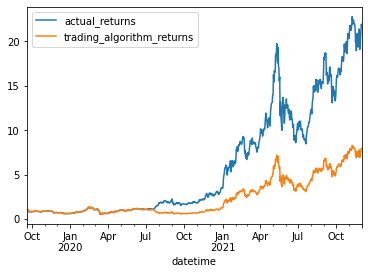

In [27]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

---

# Add a New Machine Learning Model

## Import the `LogisticRegression` model from scikit-learn.


In [28]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [29]:
# Create an instance of the LogisticRegression model
logistic_regression_model = LogisticRegression()

## Using the same training data that the SVM model used (`X_train_scaled` and `y_train`), fit the `LogisticRegression` model.

In [30]:
# Fit the LogisticRegression model
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

## Use the trained model to predict the trading signals for the training data. Use the `classification_report` module to evaluate the model.

In [31]:
# Use the trained LogisticRegression model to predict the trading signals for the training data
lr_training_signal_predictions = logistic_regression_model.predict(X_train_scaled)

# Display the predictions
lr_training_signal_predictions

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.])

In [32]:
# Generate a classification report using the training data and the logistic regression model's predications
lr_training_report = classification_report(y_train, lr_training_signal_predictions)

# Review the classification report
print(lr_training_report)

              precision    recall  f1-score   support

        -1.0       0.50      0.45      0.48        42
         1.0       0.58      0.63      0.60        51

    accuracy                           0.55        93
   macro avg       0.54      0.54      0.54        93
weighted avg       0.54      0.55      0.55        93



## Backtest the `LogisticRegression` model using the testing data to evaluate its performance.

In [33]:
# Use the trained model to predict the trading signals for the testing data.
lr_testing_signal_predictions = logistic_regression_model.predict(X_test_scaled)

In [34]:
# Generate a classification report using the testing data and the logistic regression model's predictions
lr_testing_report = classification_report(y_test, lr_testing_signal_predictions)

# Review the testing classification report
print(lr_testing_report)

              precision    recall  f1-score   support

        -1.0       0.43      0.58      0.49       367
         1.0       0.49      0.34      0.40       438

    accuracy                           0.45       805
   macro avg       0.46      0.46      0.45       805
weighted avg       0.46      0.45      0.44       805



## Compare the performance of the logistic regression and SVM models using the classification reports generated with the testing data. 

In [35]:
# Print the classification report for the Logistic Regression model using the test data
print("Logistic Regression Classification Report")
print(lr_testing_report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

        -1.0       0.43      0.58      0.49       367
         1.0       0.49      0.34      0.40       438

    accuracy                           0.45       805
   macro avg       0.46      0.46      0.45       805
weighted avg       0.46      0.45      0.44       805



In [36]:
# Print the classification report for the SVM model using the test data
print("SVM Classification Report")
print(svm_testing_report)

SVM Classification Report
              precision    recall  f1-score   support

        -1.0       0.47      0.05      0.10       367
         1.0       0.54      0.95      0.69       438

    accuracy                           0.54       805
   macro avg       0.50      0.50      0.39       805
weighted avg       0.51      0.54      0.42       805



### Answer the following question:

**Question:** Did the `LogisticRegression` perform better than the `SVM`?

**Answer:** No! The SVM model performs a bit better than the logistic regression model since it has a higher accuracy score (54% to 45%).